In [1]:
%pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from warnings import filterwarnings
filterwarnings ('ignore')

In [3]:
import pandas as pd
df=pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
df.columns=['CustomerID', 'Gender', 'Age','Income', 'Spend']
df.head()

,CustomerID,Gender,Age,Income,Spend
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


classify customers based on income and spend

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

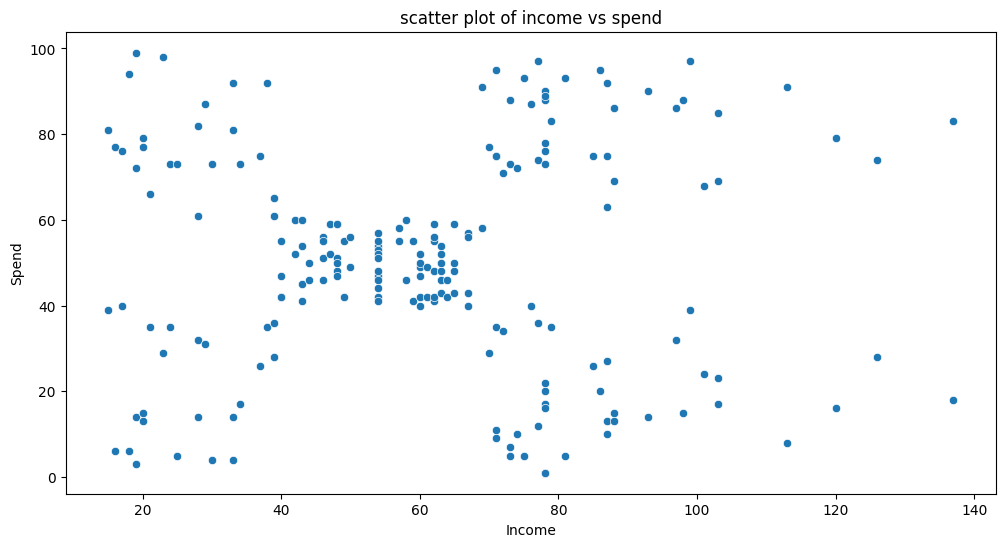

In [10]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df,x='Income',y='Spend')
plt.title('scatter plot of income vs spend')
plt.show()

separate x value from data

In [11]:
x=df[['Income','Spend']]
x.head()

,Income,Spend
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


preprocessing x

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [13]:
num_pipe=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('scaler',StandardScaler())]).set_output(transform='pandas')

In [14]:
x_pre=num_pipe.fit_transform(x)
x_pre.head()

,Income,Spend
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


for k mean method find optimal value of k with elbow method

In [15]:
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans

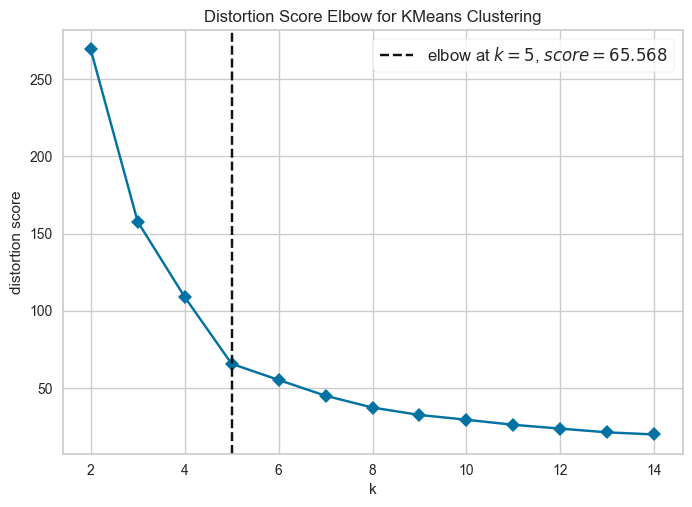

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [16]:
kelbow_visualizer(KMeans(),
                  x_pre,
                  k=(2,15),
                  timings=False)

create a kmean with number of cluster as 5

In [17]:
model=KMeans(n_clusters=5)
model.fit(x_pre)

KMeans(n_clusters=5)

In [18]:
model.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1])

In [19]:
x['Label']=model.labels_
x

,Income,Spend,Label
0,15,39,3
1,15,81,4
2,16,6,3
3,16,77,4
4,17,40,3
...,...,...,...
195,120,79,1
196,126,28,2
197,126,74,1
198,137,18,2


In [20]:
x['Label'].unique()

array([3, 4, 0, 1, 2])

In [21]:
x[x['Label']==0]

,Income,Spend,Label
43,39,61,0
46,40,55,0
47,40,47,0
48,40,42,0
49,40,42,0
...,...,...,...
121,67,40,0
122,69,58,0
126,71,35,0
132,72,34,0


In [22]:
x[x['Label']==1]

,Income,Spend,Label
123,69,91,1
125,70,77,1
127,71,95,1
129,71,75,1
131,71,75,1
133,72,71,1
135,73,88,1
137,73,73,1
139,74,72,1
141,75,93,1


In [23]:
x[x['Label']==2]

,Income,Spend,Label
124,70,29,2
128,71,11,2
130,71,9,2
134,73,5,2
136,73,7,2
138,74,10,2
140,75,5,2
144,77,12,2
146,77,36,2
148,78,22,2


visualize above clusters

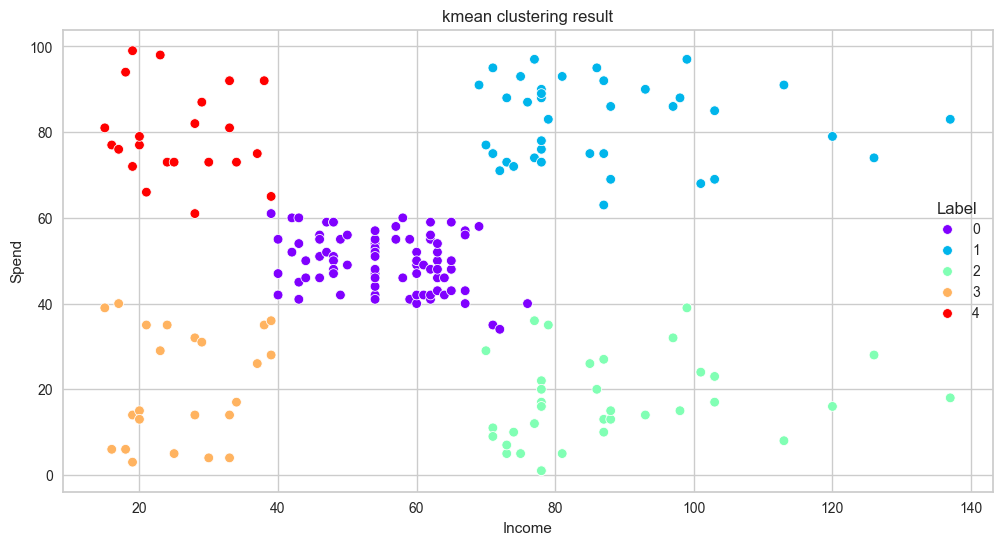

In [24]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=x,x='Income',y='Spend',hue='Label',palette='rainbow')
plt.title('kmean clustering result')
plt.show()

cluster similar customer on basis of age, spen, and income

In [25]:
x2=df[['Age','Income','Spend']]
x2

,Age,Income,Spend
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [26]:
num_pipe2=Pipeline(steps=[('impute',SimpleImputer(strategy='median')),('Scaler',StandardScaler())]).set_output(transform='pandas')

In [27]:
x2_pre=num_pipe2.fit_transform(x2)
x2_pre.head()

,Age,Income,Spend
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980


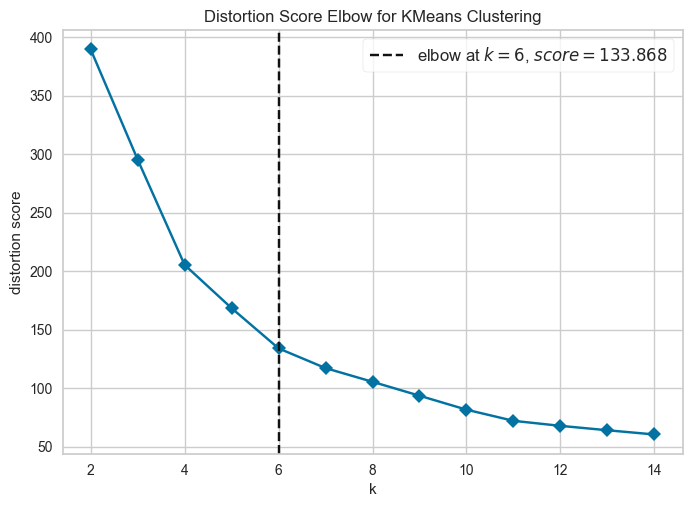

KElbowVisualizer(ax=<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>,
                 estimator=KMeans(n_clusters=14), k=(2, 15), timings=False)

In [28]:
kelbow_visualizer(KMeans(),
                  x2_pre,
                  k=(2,15),
                  timings=False)

In [29]:
model2=KMeans(n_clusters=6)
model2.fit(x2_pre)

KMeans(n_clusters=6)

In [30]:
model2.labels_

array([2, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 3, 2, 0, 4,
       0, 2, 3, 4, 4, 4, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 4,
       3, 3, 4, 4, 3, 3, 3, 3, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 3, 4,
       4, 3, 3, 4, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 4, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 4, 4, 4, 5, 4, 5, 1, 5, 1, 5, 1, 5,
       4, 5, 1, 5, 1, 5, 1, 5, 1, 5, 4, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 3, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5, 1, 5,
       1, 5])

In [31]:
x2['Label']=model2.labels_
x2

,Age,Income,Spend,Label
0,19,15,39,2
1,21,15,81,2
2,20,16,6,0
3,23,16,77,2
4,31,17,40,0
...,...,...,...,...
195,35,120,79,5
196,45,126,28,1
197,32,126,74,5
198,32,137,18,1


In [32]:
x2['Label'].unique()

array([2, 0, 3, 4, 5, 1])

In [33]:
for i in range (6):
    print('cluster number : {i} \n')
    display(x2[x2['Label']==i])
    print('\n==================================\n')

cluster number : {i} 



,Age,Income,Spend,Label
2,20,16,6,0
4,31,17,40,0
6,35,18,6,0
8,64,19,3,0
10,67,19,14,0
12,58,20,15,0
14,37,20,13,0
16,35,21,35,0
18,52,23,29,0
20,35,24,35,0




cluster number : {i} 



,Age,Income,Spend,Label
126,43,71,35,1
128,59,71,11,1
130,47,71,9,1
134,20,73,5,1
136,44,73,7,1
138,19,74,10,1
140,57,75,5,1
144,25,77,12,1
146,48,77,36,1
148,34,78,22,1




cluster number : {i} 



,Age,Income,Spend,Label
0,19,15,39,2
1,21,15,81,2
3,23,16,77,2
5,22,17,76,2
7,23,18,94,2
9,30,19,72,2
11,35,19,99,2
13,24,20,77,2
15,22,20,79,2
17,20,21,66,2




cluster number : {i} 



,Age,Income,Spend,Label
40,65,38,35,3
46,50,40,55,3
50,49,42,52,3
53,59,43,60,3
54,50,43,45,3
55,47,43,41,3
56,51,44,50,3
57,69,44,46,3
59,53,46,46,3
60,70,46,56,3




cluster number : {i} 



,Age,Income,Spend,Label
43,31,39,61,4
47,27,40,47,4
48,29,40,42,4
49,31,40,42,4
51,33,42,60,4
52,31,43,54,4
58,27,46,51,4
61,19,46,55,4
65,18,48,59,4
68,19,48,59,4




cluster number : {i} 



,Age,Income,Spend,Label
123,39,69,91,5
125,31,70,77,5
127,40,71,95,5
129,38,71,75,5
131,39,71,75,5
133,31,72,71,5
135,29,73,88,5
137,32,73,73,5
139,35,74,72,5
141,32,75,93,5


install plotly and nbformat 

In [34]:
%pip install plotly nbformat

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


plot the graph

In [35]:
import plotly.express as px

In [36]:
fig=px.scatter_3d(data_frame=x2,x='Age',y='Income',z='Spend',color='Label')
fig.show()